https://www.kaggle.com/datasets/fedesoriano/company-bankruptcy-prediction?resource=download

In [222]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

from imblearn.over_sampling import SMOTE


# Data loading

In [224]:
df = pd.read_csv('data/american_bankruptcy_dataset_ratio.csv')

In [225]:
df['status_label'] = df['status_label'].astype(int)

for company in df['company_name'].unique():
    last_year = df[df['company_name'] == company]['fyear'].max()
    df.loc[df['company_name'] == company, 'relyear'] = last_year - df.loc[df['company_name'] == company, 'fyear']

In [226]:
df.head()

,company_name,fyear,status_label,division,major_group,R_GrossProfitMargin,R_NetProfitMargin,R_ReturnOnAssets,R_ReturnOnEquity,R_CurrentRatio,R_QuickRatio,R_DebtToEquityRatio,R_DebtRatio,R_InterestCoverageRatio,R_CashFlowToDebtRatio,relyear
0,1,1999,0,3,29,-0.232300,0.020874,0.023178,-0.009666,-0.011543,-0.011200,-0.123047,-0.242554,1.081055,-0.009621,18.0
1,1,2000,0,3,29,-0.231079,0.020782,0.022964,-0.009644,-0.011543,-0.011200,-0.104248,-0.242310,-0.155029,-0.009621,17.0
2,1,2001,0,3,29,-0.231567,0.020782,0.022980,-0.009651,-0.011536,-0.011200,-0.219360,-0.243164,-0.157837,-0.009621,16.0
3,1,2002,0,3,29,-0.231689,0.020782,0.022980,-0.009651,-0.011536,-0.011200,-0.380615,-0.243652,-2.322266,-0.009621,15.0
4,1,2003,0,3,29,-0.231323,0.020798,0.023041,-0.009613,-0.006859,-0.006516,0.854492,-0.244629,-0.149170,-0.003239,14.0


Quantization

In [227]:
df.loc[:, df.select_dtypes('float').columns] = df.select_dtypes('float').astype('float16')
df.loc[:, df.select_dtypes('int').columns] = df.select_dtypes('int').astype('uint16')

In [ ]:
X = df.drop(columns='status_label')
y = df['status_label']

In [229]:
smote = SMOTE(random_state=40)

X_smote, y_smote = smote.fit_resample(X, y)

smote_df = pd.DataFrame(X_smote, columns=X.columns)
smote_df['status_label'] = y_smote

# Modeling

## Classical ML models

### Logistic regression

In [8]:
def fit_logr(X, y):
  logr = LogisticRegression(max_iter=10**5, class_weight='balanced', penalty='l2')
  logr.fit(X, y)

  y_pred = logr.predict(X)

  print(f"Accuracy: {accuracy_score(y, y_pred)}")
  print(classification_report(y, y_pred))

  ConfusionMatrixDisplay.from_predictions(y, y_pred, normalize='true')

#### Original data

/Users/paulsavala/Projects/bankruptcy/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF F,G EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.5667242825550952
              precision    recall  f1-score   support

       False       0.96      0.56      0.71     73462
        True       0.09      0.63      0.16      5220

    accuracy                           0.57     78682
   macro avg       0.52      0.60      0.43     78682
weighted avg       0.90      0.57      0.67     78682



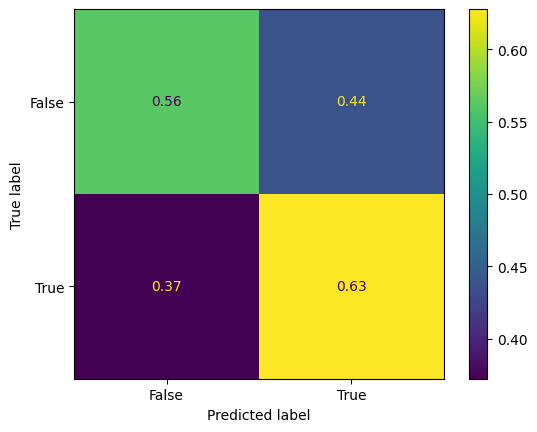

In [ ]:
fit_logr(X.drop(columns='company_name'), y)

#### Oversampled

Accuracy: 0.6141474503825107
              precision    recall  f1-score   support

       False       0.63      0.57      0.60     73462
        True       0.60      0.66      0.63     73462

    accuracy                           0.61    146924
   macro avg       0.62      0.61      0.61    146924
weighted avg       0.62      0.61      0.61    146924



/Users/paulsavala/Projects/bankruptcy/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF F,G EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


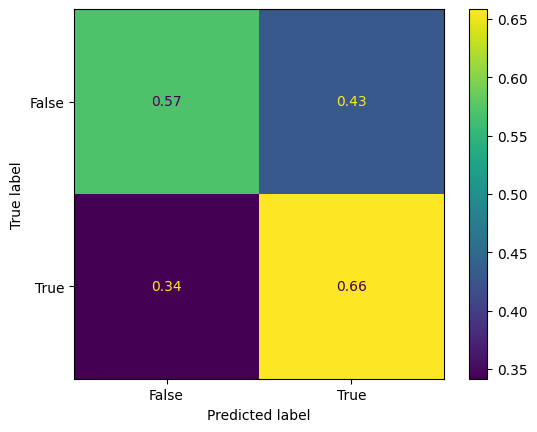

In [ ]:
fit_logr(X_smote.drop(columns='company_name'), y_smote)

### SVC

In [12]:
def fit_svc(X, y):
  svc = SVC(class_weight='balanced')
  svc.fit(X, y)

  y_pred = svc.predict(X)

  print(f"Accuracy: {accuracy_score(y, y_pred)}")
  print(classification_report(y, y_pred))

  ConfusionMatrixDisplay.from_predictions(y, y_pred, normalize='true')

#### Original data

Accuracy: 0.5959940011692636
              precision    recall  f1-score   support

       False       0.94      0.61      0.74     73462
        True       0.07      0.41      0.12      5220

    accuracy                           0.60     78682
   macro avg       0.50      0.51      0.43     78682
weighted avg       0.88      0.60      0.70     78682



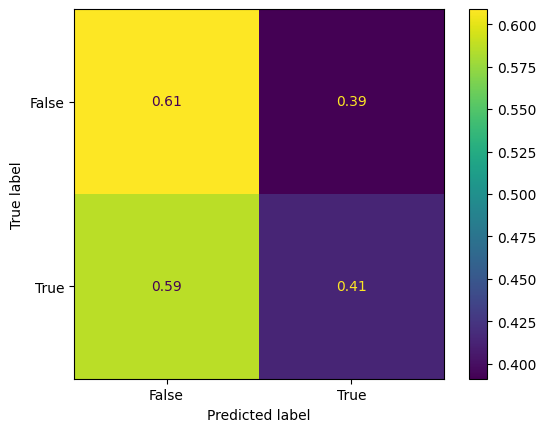

In [ ]:
fit_svc(X.drop(columns='company_name'), y)

#### Oversampled

Accuracy: 0.5241145081811004
              precision    recall  f1-score   support

       False       0.52      0.65      0.58     73462
        True       0.53      0.40      0.46     73462

    accuracy                           0.52    146924
   macro avg       0.53      0.52      0.52    146924
weighted avg       0.53      0.52      0.52    146924



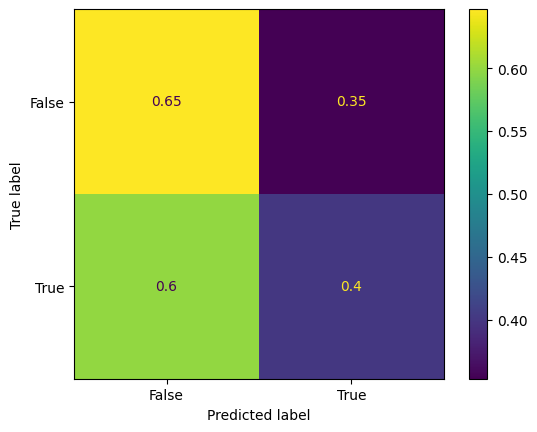

In [ ]:
fit_svc(X_smote.drop(columns='company_name'), y_smote)

### Gradient boosting

In [184]:
def fit_gbc(X, y):
  gbc_params = {'n_estimators': 100,
                'learning_rate': 0.01,
                'max_depth': 5,
                'subsample': 0.5,
                'max_features': 0.5}

  gbc = GradientBoostingClassifier(**gbc_params)
  gbc.fit(X, y)

  y_pred = gbc.predict(X)

  ConfusionMatrixDisplay.from_predictions(y, y_pred, normalize='true')
  
  return gbc

#### Original data

GBC doesn't handle imbalanced data well, no point in fitting it on the original data.

In [ ]:
# fit_gbc(X, y)

#### Oversampled

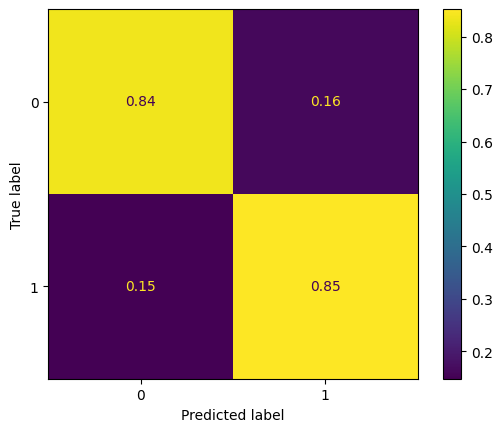

In [ ]:
gbc = fit_gbc(X_smote.drop(columns='company_name'), y_smote)

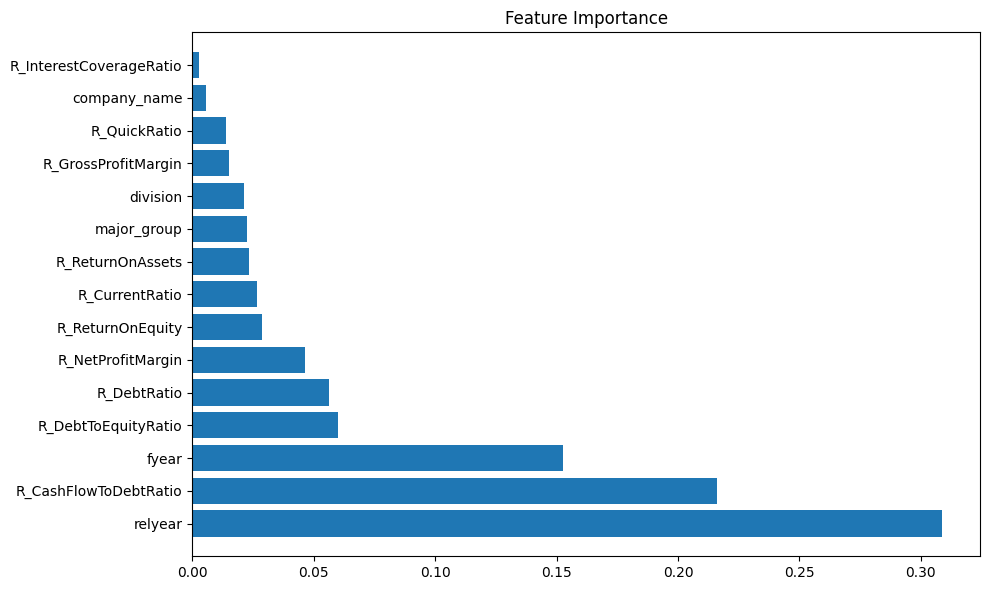

In [190]:
# Plot feature importance
importance = gbc.feature_importances_
indices = np.argsort(importance)[::-1]
features = X_smote.columns[indices]
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.barh(range(X_smote.shape[1]), importance[indices], align="center")
plt.yticks(range(X_smote.shape[1]), features)
plt.ylim([-1, X_smote.shape[1]])
plt.tight_layout()

In [191]:
y_smote_proba = gbc.predict_proba(X_smote)

In [192]:
gbc_probs = y_smote_proba[:, 1]

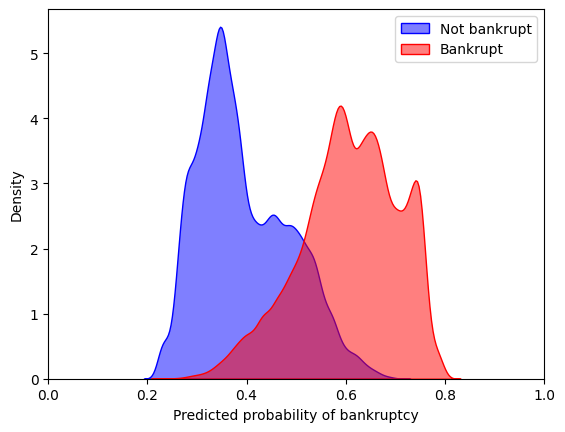

In [193]:
# Seaborn kdeplot, but with one color for y_smote == 0 and another for y_smote == 1
sns.kdeplot(gbc_probs[y_smote == 0], color='blue', label='Not bankrupt', fill=True, alpha=0.5)
sns.kdeplot(gbc_probs[y_smote == 1], color='red', label='Bankrupt', fill=True, alpha=0.5)
plt.legend()
plt.xlabel('Predicted probability of bankruptcy')
plt.xlim(0, 1);

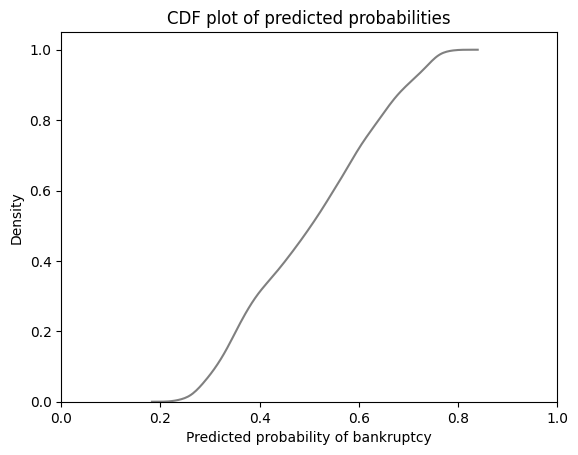

In [194]:
# Make a cumulative distribution function (CDF) plot
sns.kdeplot(gbc_probs, color='gray', label='Overall', cumulative=True)
plt.xlabel('Predicted probability of bankruptcy')
plt.xlim(0, 1)
plt.title('CDF plot of predicted probabilities');

## Transformer model

### Model dataset class

In [257]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from torch.nn.utils.rnn import pad_sequence
from torch.optim.lr_scheduler import ReduceLROnPlateau
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc

class FinancialTimeSeriesDataset(Dataset):
    """Dataset for financial time series data with company-level sequences."""
    
    def __init__(self, df, feature_cols, max_seq_length=20, min_seq_length=3, scaler=None):
        """
        Args:
            df: DataFrame with columns fyear, company_name, status_label, and features
            feature_cols: List of feature column names
            max_seq_length: Maximum sequence length (will pad shorter sequences)
            min_seq_length: Minimum years required to include a company
            scaler: StandardScaler instance (fit on training data)
        """
        self.df = df.sort_values(['company_name', 'fyear'])
        self.feature_cols = feature_cols
        self.max_seq_length = max_seq_length
        self.min_seq_length = min_seq_length
        
        # Fit or use provided scaler
        if scaler is None:
            self.scaler = StandardScaler()
            self.scaler.fit(df[feature_cols])
        else:
            self.scaler = scaler
        
        # Create sequences for each company
        self.sequences = []
        self.labels = []
        self.seq_lengths = []
        self.company_ids = []
        
        for company in df['company_name'].unique():
            company_data = self.df[self.df['company_name'] == company]
            
            # Skip if not enough history
            if len(company_data) < min_seq_length:
                continue
            
            # Get features and normalize
            features = company_data[feature_cols].values
            features_scaled = self.scaler.transform(features)
            
            # Get label from last year
            label = company_data.iloc[-1]['status_label']
            
            # Store actual sequence length
            actual_length = min(len(features_scaled), max_seq_length)
            
            # Truncate if longer than max_seq_length
            if len(features_scaled) > max_seq_length:
                features_scaled = features_scaled[-max_seq_length:]
            
            self.sequences.append(features_scaled)
            self.labels.append(label)
            self.seq_lengths.append(actual_length)
            self.company_ids.append(company)
    
    def __len__(self):
        return len(self.sequences)
    
    def __getitem__(self, idx):
        return (
            torch.FloatTensor(self.sequences[idx]),
            torch.FloatTensor([self.labels[idx]]).squeeze(-1),
            self.seq_lengths[idx],
            self.company_ids[idx]
        )

### Helper functions

In [258]:
def collate_fn(batch):
    """Custom collate function to handle variable length sequences."""
    sequences, labels, lengths, company_ids = zip(*batch)
    
    # Pad sequences to the same length
    padded_sequences = pad_sequence(
        [s for s in sequences], 
        batch_first=True, 
        padding_value=0.0
    )
    
    # Create padding mask (True for padded positions)
    batch_size, max_len, _ = padded_sequences.shape
    mask = torch.arange(max_len).expand(batch_size, max_len) >= torch.tensor(lengths).unsqueeze(1)
    
    labels = torch.stack(labels)
    
    return padded_sequences, labels, mask, company_ids

class PositionalEncoding(nn.Module):
    """Add positional encoding to embeddings."""
    
    def __init__(self, d_model, max_len=100):
        super().__init__()
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * 
                           (-np.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        self.register_buffer('pe', pe.unsqueeze(0))
    
    def forward(self, x):
        return x + self.pe[:, :x.size(1)]
    
def create_weighted_sampler(dataset, pos_weight=10.0):
    """Create weighted sampler for imbalanced dataset."""
    labels = [dataset[i][1].item() for i in range(len(dataset))]
    weights = [pos_weight if label == 0 else 1.0 for label in labels]
    sampler = torch.utils.data.WeightedRandomSampler(
        weights=weights,
        num_samples=len(weights),
        replacement=True
    )
    return sampler

class FocalLoss(nn.Module):
    """Focal loss for handling class imbalance."""
    
    def __init__(self, alpha=0.25, gamma=2.0):
        super().__init__()
        self.alpha = alpha
        self.gamma = gamma
    
    def forward(self, inputs, targets):
        bce_loss = F.binary_cross_entropy(inputs, targets, reduction='none')
        pt = torch.where(targets == 1, inputs, 1 - inputs)
        focal_loss = self.alpha * (1 - pt) ** self.gamma * bce_loss
        return focal_loss.mean()

### Model definition

In [259]:
class FinancialTransformer(nn.Module):
    """Transformer model for bankruptcy prediction."""
    
    def __init__(self, input_dim, d_model=128, nhead=8, num_layers=3, 
                 dropout=0.1, max_seq_length=20):
        super().__init__()
        
        # Input projection
        self.input_projection = nn.Linear(input_dim, d_model)
        
        # Positional encoding
        self.pos_encoder = PositionalEncoding(d_model, max_seq_length)
        
        # Transformer encoder
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=d_model,
            nhead=nhead,
            dim_feedforward=d_model * 4,
            dropout=dropout,
            activation='relu',
            batch_first=True
        )
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        
        # Output layers
        self.dropout = nn.Dropout(dropout)
        self.fc1 = nn.Linear(d_model, d_model // 2)
        self.fc2 = nn.Linear(d_model // 2, 1)
        
        # Layer normalization
        self.norm = nn.LayerNorm(d_model)
        
    def forward(self, x, mask=None):
        # x shape: (batch_size, seq_length, input_dim)
        
        # Project input
        x = self.input_projection(x)
        x = self.norm(x)
        
        # Add positional encoding
        x = self.pos_encoder(x)
        
        # Pass through transformer
        x = self.transformer(x, src_key_padding_mask=mask)
        
        # Global average pooling over sequence
        if mask is not None:
            # Mask out padded positions
            mask_expanded = mask.unsqueeze(-1).expand(x.size())
            x = x.masked_fill(mask_expanded, 0)
            lengths = (~mask).sum(dim=1, keepdim=True).float()
            x = x.sum(dim=1) / lengths
        else:
            x = x.mean(dim=1)
        
        # Classification head
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        
        return x.squeeze(-1)

### Training function

In [260]:
def train_model(model, train_loader, val_loader, num_epochs=50, 
                learning_rate=1e-3, device='cpu'):
    """Train the transformer model with class balancing and debugging."""
    
    model = model.to(device)
    
    # Use class weighting if data is still imbalanced
    criterion = nn.BCEWithLogitsLoss()
    
    optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=0.01)
    scheduler = ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=5)
    
    best_auc = 0
    
    for epoch in range(num_epochs):
        # Training
        model.train()
        train_loss = 0
        train_preds = []
        train_labels = []
        
        for batch_idx, (sequences, labels, mask, _) in enumerate(train_loader):
            sequences = sequences.to(device)
            labels = labels.to(device)
            mask = mask.to(device)
            
            # Debug: Check label distribution in first few batches
            if epoch == 0 and batch_idx < 3:
                pos_count = labels.sum().item()
                total_count = len(labels)
                print(f"Batch {batch_idx}: {pos_count}/{total_count} positive labels ({pos_count/total_count:.3f})")
            
            optimizer.zero_grad()
            outputs = model(sequences, mask=mask)
            
            # Debug: Check output shapes and values
            if epoch == 0 and batch_idx == 0:
                print(f"Outputs shape: {outputs.shape}")
                print(f"Labels shape: {labels.shape}")
                print(f"Output range: [{outputs.min().item():.4f}, {outputs.max().item():.4f}]")
            
            loss = criterion(outputs, labels.float())  # Ensure labels are float
            loss.backward()
            
            # Gradient clipping
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            
            optimizer.step()
            
            train_loss += loss.item()
            # Store logits for AUC calculation
            train_preds.extend(torch.sigmoid(outputs).detach().cpu().numpy())
            train_labels.extend(labels.cpu().numpy())
        
        # Validation
        model.eval()
        val_loss = 0
        val_preds = []
        val_labels = []
        
        with torch.no_grad():
            for sequences, labels, mask, _ in val_loader:
                sequences = sequences.to(device)
                labels = labels.to(device)
                mask = mask.to(device)
                
                outputs = model(sequences, mask=mask)
                loss = criterion(outputs, labels.float())
                
                val_loss += loss.item()
                # Convert logits to probabilities for metrics
                val_preds.extend(torch.sigmoid(outputs).cpu().numpy())
                val_labels.extend(labels.cpu().numpy())
        
        # Debug: Check prediction distribution
        train_pred_array = np.array(train_preds)
        val_pred_array = np.array(val_preds)
        
        if epoch % 5 == 0:
            print(f"\nEpoch {epoch} Prediction Analysis:")
            print(f"Train predictions - min: {train_pred_array.min():.4f}, max: {train_pred_array.max():.4f}, mean: {train_pred_array.mean():.4f}")
            print(f"Val predictions - min: {val_pred_array.min():.4f}, max: {val_pred_array.max():.4f}, mean: {val_pred_array.mean():.4f}")
            
            # Check how many predictions are above/below 0.5
            train_above_half = (train_pred_array > 0.5).sum()
            val_above_half = (val_pred_array > 0.5).sum()
            print(f"Predictions > 0.5: Train {train_above_half}/{len(train_pred_array)}, Val {val_above_half}/{len(val_pred_array)}")
        
        # Calculate metrics
        train_auc = roc_auc_score(train_labels, train_preds)
        val_auc = roc_auc_score(val_labels, val_preds)
        
        # Calculate PR-AUC (important for imbalanced data)
        precision, recall, _ = precision_recall_curve(val_labels, val_preds)
        val_pr_auc = auc(recall, precision)
        
        # Update learning rate
        scheduler.step(val_auc)
        
        # Save best model
        if val_auc > best_auc:
            best_auc = val_auc
            torch.save(model.state_dict(), 'best_bankruptcy_model.pth')
        
        if epoch % 5 == 0:
            print(f'Epoch {epoch}: Train Loss: {train_loss/len(train_loader):.4f}, '
                  f'Train AUC: {train_auc:.4f}, Val AUC: {val_auc:.4f}, '
                  f'Val PR-AUC: {val_pr_auc:.4f}')
    
    return model

In [261]:
def prepare_and_train(df, feature_cols, max_seq_length=20, min_seq_length=3,
                      test_size=0.2, batch_size=64, num_epochs=50, use_smote=True):
    """Complete pipeline for data preparation and training."""
    
    # Split by company to avoid data leakage
    companies = df['company_name'].unique()
    train_companies, test_companies = train_test_split(
        companies, test_size=test_size, random_state=42
    )
    
    train_df = df[df['company_name'].isin(train_companies)]
    test_df = df[df['company_name'].isin(test_companies)]
    
    # Create datasets
    train_dataset = FinancialTimeSeriesDataset(
        train_df, feature_cols, max_seq_length, min_seq_length
    )
    test_dataset = FinancialTimeSeriesDataset(
        test_df, feature_cols, max_seq_length, min_seq_length, 
        scaler=train_dataset.scaler
    )
    
    # Check class distribution in dataset
    train_pos = sum(d[1].item() for d in train_dataset)
    train_total = len(train_dataset)
    
    # Choose sampling strategy based on whether SMOTE was used
    if use_smote:
        # Data is already balanced, use regular sampling
        train_loader = DataLoader(
            train_dataset, batch_size=batch_size, shuffle=True,
            collate_fn=collate_fn
        )
    else:
        # Data is imbalanced, use weighted sampling
        pos_weight = (train_total - train_pos) / train_pos
        print(f"Using weighted sampling with pos_weight: {pos_weight:.2f}")
        train_sampler = create_weighted_sampler(train_dataset, pos_weight=min(pos_weight, 10.0))
        train_loader = DataLoader(
            train_dataset, batch_size=batch_size, sampler=train_sampler,
            collate_fn=collate_fn
        )
    
    test_loader = DataLoader(
        test_dataset, batch_size=batch_size, shuffle=False,
        collate_fn=collate_fn
    )
    
    # Initialize model
    input_dim = len(feature_cols)
    model = FinancialTransformer(
        input_dim=input_dim,
        d_model=256,  # Increased model capacity
        nhead=8,
        num_layers=3,
        dropout=0.2,
        max_seq_length=max_seq_length
    )
    
    # Train model with lower learning rate
    device = torch.device('cpu')
    print(f"Training on device: {device}")
    
    trained_model = train_model(
        model, train_loader, test_loader, 
        num_epochs=num_epochs, learning_rate=5e-4, device=device  # Lower LR
    )
    
    return trained_model, train_dataset.scaler

### Evaluation functions

In [306]:
# Inference function for new predictions
def predict_bankruptcy(model, df, feature_cols, scaler, company_names=None, 
                      max_seq_length=20, device='cpu'):
    """Make predictions for specific companies or all companies in dataframe."""

    model.eval()
    model = model.to(device)

    if company_names is None:
        company_names = df['company_name'].unique()

    predictions = {}

    with torch.no_grad():
        for company in company_names:
            company_data = df[df['company_name'] == company].sort_values('fyear')

            if len(company_data) == 0:
                continue

            # Get features and normalize
            features = company_data[feature_cols].values
            features_scaled = scaler.transform(features)

            # Truncate if needed
            if len(features_scaled) > max_seq_length:
                features_scaled = features_scaled[-max_seq_length:]

            # Convert to tensor and add batch dimension
            seq_tensor = torch.FloatTensor(features_scaled).unsqueeze(0).to(device)

            # No mask needed for single sequence
            output = model(seq_tensor)
            # print(output.cpu().numpy().shape)
            prob = output.cpu().numpy()[0]

            predictions[company] = {
                'bankruptcy_probability': prob,
                'prediction': 0 if prob < 0.5 else 1,  # 0 = bankruptcy, 1 = healthy,
                'actual': company_data.iloc[-1]['status_label'],
                'years_analyzed': len(features_scaled)
            }

    return predictions

### Model fitting

In [263]:
# Define feature columns
feature_cols = [col for col in smote_df.columns if col not in 
               ['fyear', 'relyear', 'company_name', 'division', 'major_group', 'status_label']]

In [264]:
# Train with variable length sequences
model, scaler = prepare_and_train(
    smote_df, 
    feature_cols, 
    max_seq_length=20,    # Maximum 20 years
    min_seq_length=3,     # Minimum 3 years required
    test_size=0.2,
    batch_size=64,
    num_epochs=25
)

Training on device: cpu
Batch 0: 10.0/64 positive labels (0.156)
Outputs shape: torch.Size([64])
Labels shape: torch.Size([64])
Output range: [-0.5219, 0.3646]
Batch 1: 6.0/64 positive labels (0.094)
Batch 2: 3.0/64 positive labels (0.047)

Epoch 0 Prediction Analysis:
Train predictions - min: 0.0054, max: 0.9707, mean: 0.1117
Val predictions - min: 0.0317, max: 0.9637, mean: 0.1091
Predictions > 0.5: Train 223/5952, Val 83/1515
Epoch 0: Train Loss: 0.2839, Train AUC: 0.7455, Val AUC: 0.8700, Val PR-AUC: 0.7163

Epoch 5 Prediction Analysis:
Train predictions - min: 0.0023, max: 0.9972, mean: 0.1096
Val predictions - min: 0.0063, max: 0.9805, mean: 0.0966
Predictions > 0.5: Train 417/5952, Val 99/1515
Epoch 5: Train Loss: 0.1823, Train AUC: 0.8734, Val AUC: 0.7864, Val PR-AUC: 0.6146

Epoch 10 Prediction Analysis:
Train predictions - min: 0.0011, max: 0.9986, mean: 0.1087
Val predictions - min: 0.0037, max: 0.9972, mean: 0.1286
Predictions > 0.5: Train 420/5952, Val 148/1515
Epoch 10: T

In [307]:
# Make predictions
predictions = predict_bankruptcy(
    model, 
    smote_df, 
    feature_cols, 
    scaler
)

In [316]:
predictions_df = pd.DataFrame(predictions).T

predictions_df.loc[predictions_df['bankruptcy_probability'] < 0, 'bankruptcy_probability'] = 0
predictions_df.loc[predictions_df['bankruptcy_probability'] > 1, 'bankruptcy_probability'] = 1

predictions_df.head()

,bankruptcy_probability,prediction,actual,years_analyzed
1,0.0,0.0,0.0,19.0
2,0.0,0.0,0.0,12.0
3,0.0,0.0,0.0,9.0
4,0.0,0.0,0.0,9.0
5,0.0,0.0,0.0,1.0


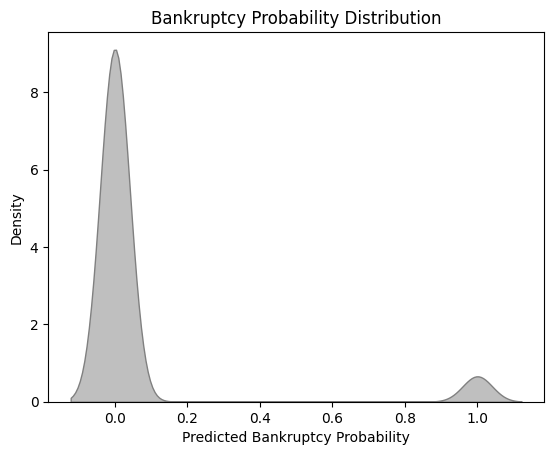

In [311]:
# Seaborn kdeplot for bankruptcy probabilities
sns.kdeplot(predictions_df['bankruptcy_probability'], color='gray', fill=True, alpha=0.5)

plt.title('Bankruptcy Probability Distribution')
plt.xlabel('Predicted Bankruptcy Probability');

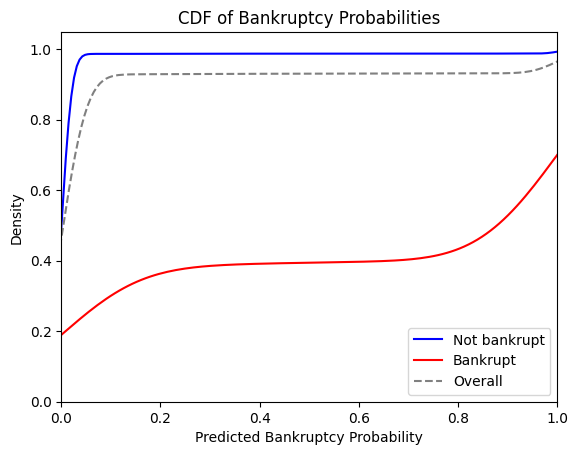

In [312]:
# Plot a cumulative distribution function (CDF) for bankruptcy probabilities, colored by actual status
sns.kdeplot(predictions_df[predictions_df['actual'] == 0]['bankruptcy_probability'], color='blue', cumulative=True, label='Not bankrupt')
sns.kdeplot(predictions_df[predictions_df['actual'] == 1]['bankruptcy_probability'], color='red', cumulative=True, label='Bankrupt')
sns.kdeplot(predictions_df['bankruptcy_probability'], color='gray', cumulative=True, label='Overall', linestyle='--')
plt.legend()
plt.title('CDF of Bankruptcy Probabilities')
plt.xlabel('Predicted Bankruptcy Probability')
plt.xlim(0, 1);

Text(0.5, 1.0, 'Confusion Matrix for Bankruptcy Predictions')

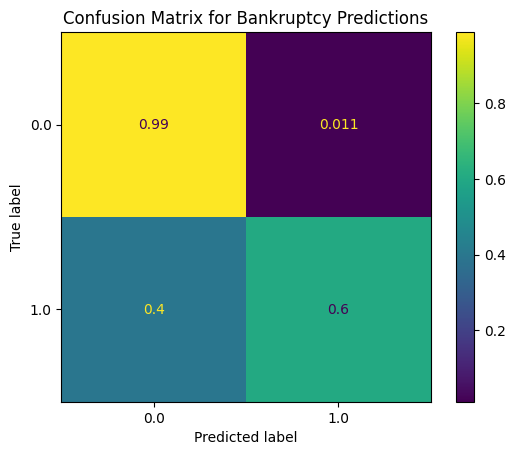

In [313]:
ConfusionMatrixDisplay.from_predictions(
    predictions_df['actual'], 
    predictions_df['prediction'], 
    normalize='true'
)
plt.title('Confusion Matrix for Bankruptcy Predictions')

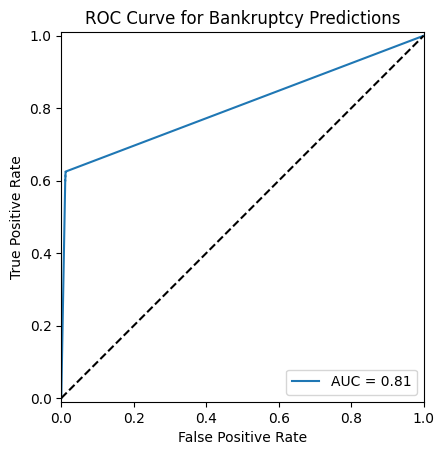

In [315]:
# Plot ROC curve
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay

fpr, tpr, thresholds = roc_curve(predictions_df['actual'], predictions_df['bankruptcy_probability'])
roc_auc = auc(fpr, tpr)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()
plt.title('ROC Curve for Bankruptcy Predictions')
plt.xlim(0, 1)
# Add dashed line for random guessing
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')